In [1]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/helpers.py /content
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/utils.py /content
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/models.py /content
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/data_augmentation.py /content

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q -U keras-tuner

# **Building and testing different U-Net models**

In [3]:

import numpy as np
import tensorflow as tf
import keras_tuner as kt
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from utils import *
from helpers import *
from models import *
from data_augmentation import *


## **Loading the training data**

### Loading original training data

In [4]:
# Loaded a set of images
root_dir = "/content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/"
image_dir = root_dir + "images/"
gt_dir = root_dir + "groundtruth/"

imgs = extract_data_for_unet(image_dir, 100)
gt_imgs = extract_labels_for_unet(gt_dir, 100)

Loaded 100 images.
Loaded 100 groundtruth images.
Shape of GT images :  (100, 400, 400)


### Augmenting the data...

In [5]:
satellite_images = load_images_from_folder('/content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/images')
groundtruth_images = load_images_from_folder('/content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/groundtruth', is_gray=True)

# Perform augmentation
aug_imgs, aug_gts = augment_images_no_save(satellite_images, groundtruth_images)
aug_gts = one_hot(aug_gts)

100
100


### Creating the training and testing sets

In [6]:
all_imgs = np.append(imgs, aug_imgs, axis=0)
all_gts = np.append(gt_imgs, aug_gts, axis=0)

In [7]:
x_tr, x_te, y_tr, y_te = split_data(all_imgs, all_gts, 0.85)

## **1st model : U-Net A32RD**
U-net model with 4 stages starting with a filter of size 32. 1e-6 L2-regularization, 0.1 dropout, trained with batch sizes 4.

**Best model on AICrowd...**

In [8]:
modelA32RD = build_unet(dropout = 0.1, activation='relu', regularization=1e-6)
modelA32RD.compile(optimizer='adam',
                loss=TverskyLoss,
                metrics=['accuracy'])
callbacks_A32RD = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from_A32RDv2', save_weights_only=True, verbose=1)]
history_A32R = modelA32RD.fit(x_tr, y_tr, batch_size=4, epochs=200, validation_data=(x_te, y_te), callbacks=[callbacks_A32RD])


Epoch 1/200
277/277 [==============================] - ETA: 0s - loss: 0.1529 - accuracy: 0.8617
Epoch 1: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from_A32RDv2
277/277 [==============================] - 41s 69ms/step - loss: 0.1529 - accuracy: 0.8617 - val_loss: 0.1399 - val_accuracy: 0.8662
Epoch 2/200
276/277 [============================>.] - ETA: 0s - loss: 0.0977 - accuracy: 0.9089
Epoch 2: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from_A32RDv2
277/277 [==============================] - 13s 47ms/step - loss: 0.0977 - accuracy: 0.9089 - val_loss: 0.1215 - val_accuracy: 0.8846
Epoch 3/200
277/277 [==============================] - ETA: 0s - loss: 0.0825 - accuracy: 0.9238
Epoch 3: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from_A32RDv2
277/277 [==============================] - 13s 47ms/step - loss: 0.0825 - accuracy: 0.9238 - val_loss: 0.0924 - val_accuracy: 0.9140
Epoch 4/200
277/277 [=======

In [9]:
train_f1=evaluating_model_f1(x_tr, y_tr, modelA32RD)
print("the training f1 score is: ", train_f1)

validate_f1=evaluating_model_f1(x_te, y_te, modelA32RD)
print("the validating f1 score is:", validate_f1)

35/35 [==============================] - 10s 138ms/step
the training f1 score is:  0.9601975525184177
7/7 [==============================] - 0s 65ms/step
the validating f1 score is: 0.8989202880215958


1/1 [==============================] - 0s 23ms/step


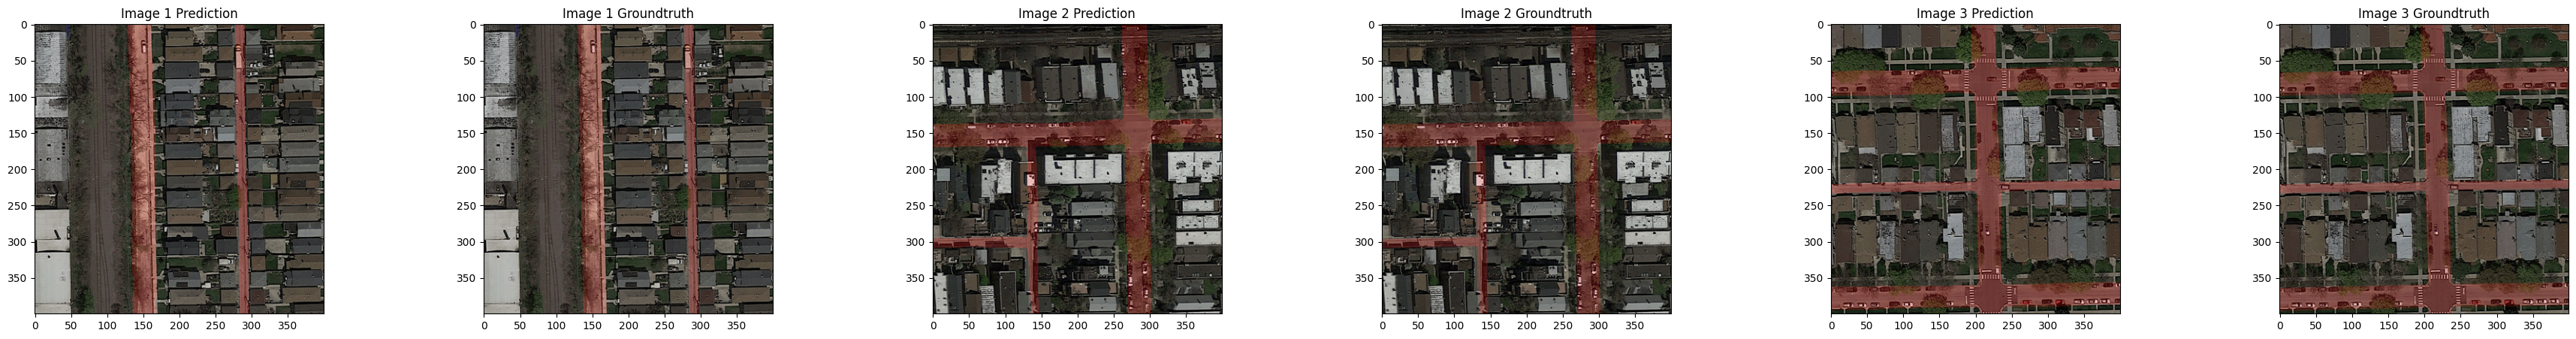

In [10]:
my_show_predictions1(modelA32RD, 3)

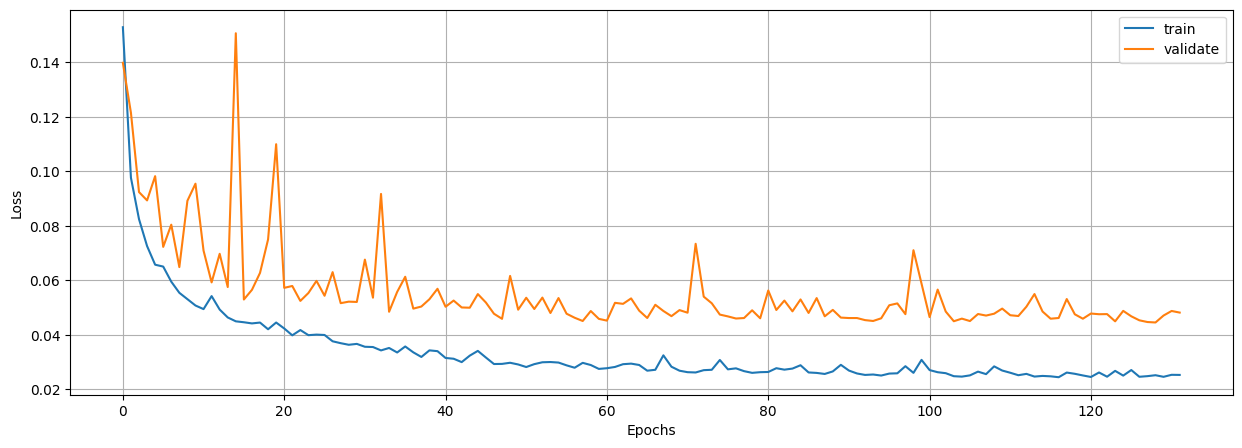

In [12]:
plt.figure(figsize=(15, 5))

plt.plot(history_A32R.history['loss'])
plt.plot(history_A32R.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validate'], loc='upper right')
#plt.ylim([0, 1.3])
plt.grid()
plt.show()

## **2nd model : U-Net A64RD**
U-net model with 4 stages starting with a filter of size 64. 1e-8 L2-regularization, 0.1 dropout, trained with batch sizes 4.

In [15]:
modelA64RD = build_unet(start_filter=64, num_stages= 4,dropout = 0.1, activation='relu', regularization=1e-8)
modelA64RD.compile(optimizer='adam',
                loss=TverskyLoss,
                metrics=['accuracy'])
callbacks_A64RD = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64RD', save_weights_only=True, verbose=1)]
history_A64RDs = modelA64RD.fit(x_tr, y_tr, batch_size=4, epochs=200, validation_data=(x_te, y_te), callbacks=[callbacks_A64RD])

Epoch 1/200
277/277 [==============================] - ETA: 0s - loss: 0.1499 - accuracy: 0.8542
Epoch 1: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64RD
277/277 [==============================] - 65s 123ms/step - loss: 0.1499 - accuracy: 0.8542 - val_loss: 0.1783 - val_accuracy: 0.8220
Epoch 2/200
276/277 [============================>.] - ETA: 0s - loss: 0.1004 - accuracy: 0.9000
Epoch 2: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64RD
277/277 [==============================] - 24s 88ms/step - loss: 0.1005 - accuracy: 0.9000 - val_loss: 0.1516 - val_accuracy: 0.8486
Epoch 3/200
276/277 [============================>.] - ETA: 0s - loss: 0.0842 - accuracy: 0.9161
Epoch 3: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64RD
277/277 [==============================] - 24s 88ms/step - loss: 0.0842 - accuracy: 0.9161 - val_loss: 0.1063 - val_accuracy: 0.8939
Epoch 4/200
276/277 [===============

In [16]:
train_f1=evaluating_model_f1(x_tr, y_tr, modelA64RD)
print("the training f1 score is: ", train_f1)

validate_f1=evaluating_model_f1(x_te, y_te, modelA64RD)
print("the validating f1 score is:", validate_f1)

35/35 [==============================] - 20s 286ms/step
the training f1 score is:  0.9697850789897005
7/7 [==============================] - 1s 129ms/step
the validating f1 score is: 0.9062015745187908


1/1 [==============================] - 0s 23ms/step


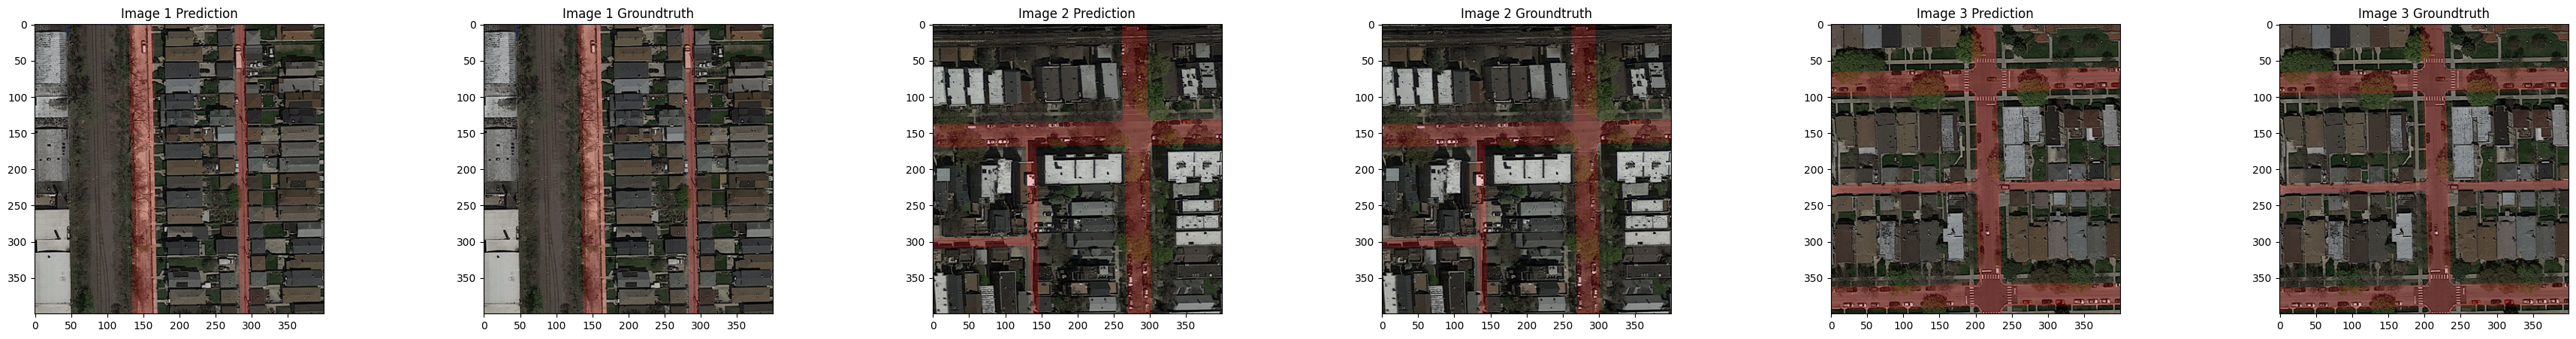

In [17]:
my_show_predictions1(modelA64RD, 3)

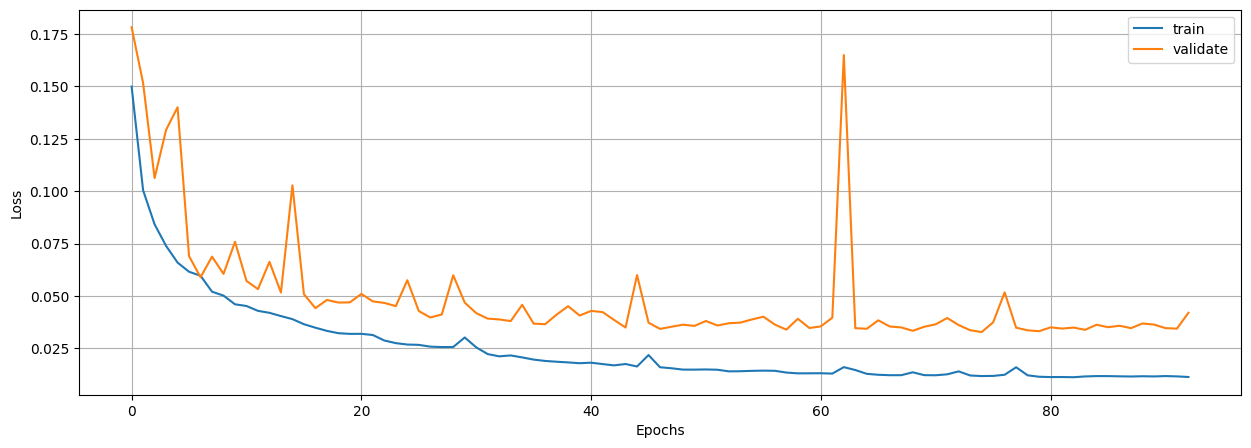

In [19]:
plt.figure(figsize=(15, 5))

plt.plot(history_A64RDs.history['loss'])
plt.plot(history_A64RDs.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validate'], loc='upper right')
#plt.ylim([0, 1.3])
plt.grid()
plt.show()

## **3rd model : U-Net A64**
U-net model with 4 stages starting with a filter of size 64. No L2-regularization, No dropout, trained with batch sizes 8.

**Without regularization and without dropout we can observe a huge overfit...**

In [20]:
modelA64 = build_unet(start_filter=64, num_stages= 4,dropout = 0, activation='relu', regularization=0)
modelA64.compile(optimizer='adam',
                loss=TverskyLoss,
                metrics=['accuracy'])
callbacks_A64 = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64', save_weights_only=True, verbose=1)]
history_A64 = modelA64RD.fit(x_tr, y_tr, batch_size=8, epochs=200, validation_data=(x_te, y_te), callbacks=[callbacks_A64])

Epoch 1/200
138/139 [============================>.] - ETA: 0s - loss: 0.0105 - accuracy: 0.9915
Epoch 1: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64
139/139 [==============================] - 73s 176ms/step - loss: 0.0106 - accuracy: 0.9914 - val_loss: 0.0326 - val_accuracy: 0.9694
Epoch 2/200
138/139 [============================>.] - ETA: 0s - loss: 0.0100 - accuracy: 0.9920
Epoch 2: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64
139/139 [==============================] - 23s 164ms/step - loss: 0.0100 - accuracy: 0.9920 - val_loss: 0.0332 - val_accuracy: 0.9688
Epoch 3/200
138/139 [============================>.] - ETA: 0s - loss: 0.0098 - accuracy: 0.9922
Epoch 3: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64
139/139 [==============================] - 23s 164ms/step - loss: 0.0098 - accuracy: 0.9922 - val_loss: 0.0339 - val_accuracy: 0.9681
Epoch 4/200
138/139 [===================

In [21]:
train_f1=evaluating_model_f1(x_tr, y_tr, modelA64)
print("the training f1 score is: ", train_f1)

validate_f1=evaluating_model_f1(x_te, y_te, modelA64)
print("the validating f1 score is:", validate_f1)

35/35 [==============================] - 5s 129ms/step
the training f1 score is:  0.05395268027986439
7/7 [==============================] - 1s 128ms/step
the validating f1 score is: 0.055256764844434536


1/1 [==============================] - 0s 22ms/step


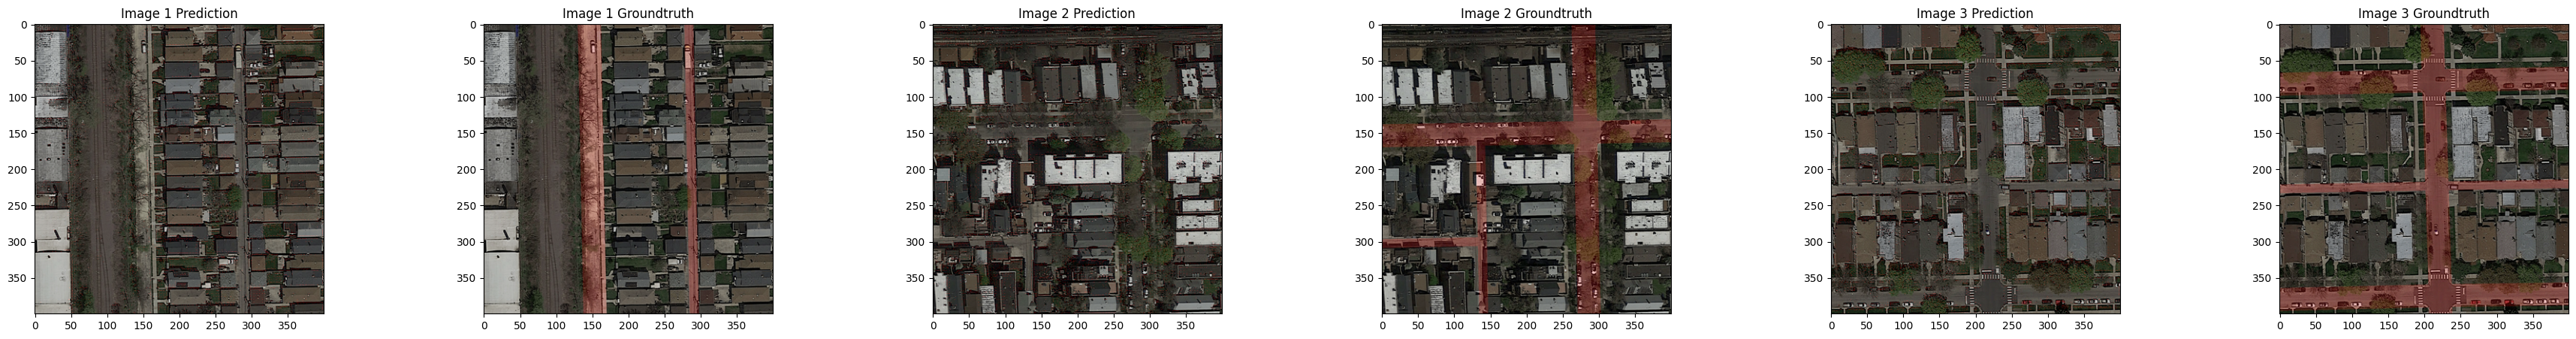

In [22]:
my_show_predictions1(modelA64, 3)

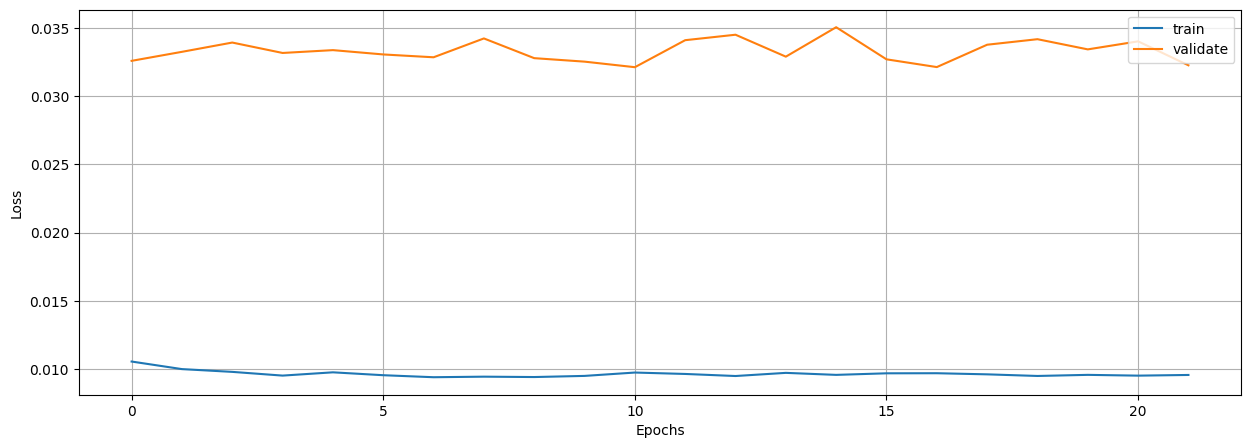

In [23]:
plt.figure(figsize=(15, 5))

plt.plot(history_A64.history['loss'])
plt.plot(history_A64.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validate'], loc='upper right')
#plt.ylim([0, 1.3])
plt.grid()
plt.show()

## **4th model : U-Net A32RDv3**
U-net model with 4 stages starting with a filter of size 32. 1e-4 L2-regularization, 0.2 dropout, trained with batch sizes 8.

In [24]:
modelA32RDv3 = build_unet(start_filter=32, num_stages= 4,dropout = 0.2, activation='relu', regularization=1e-4)
modelA32RDv3.compile(optimizer='adam',
                loss=TverskyLoss,
                metrics=['accuracy'])
callbacks_A32RDv3 = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA32RDv3', save_weights_only=True, verbose=1)]
history_A32RDv3 = modelA32RDv3.fit(x_tr, y_tr, batch_size=8, epochs=200, validation_data=(x_te, y_te), callbacks=[callbacks_A32RDv3])

Epoch 1/200
138/139 [============================>.] - ETA: 0s - loss: 0.4161 - accuracy: 0.8230
Epoch 1: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA32RDv3
139/139 [==============================] - 37s 97ms/step - loss: 0.4160 - accuracy: 0.8229 - val_loss: 0.3067 - val_accuracy: 0.8201
Epoch 2/200
138/139 [============================>.] - ETA: 0s - loss: 0.2127 - accuracy: 0.8937
Epoch 2: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA32RDv3
139/139 [==============================] - 12s 86ms/step - loss: 0.2127 - accuracy: 0.8937 - val_loss: 0.2640 - val_accuracy: 0.8269
Epoch 3/200
138/139 [============================>.] - ETA: 0s - loss: 0.1708 - accuracy: 0.9132
Epoch 3: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA32RDv3
139/139 [==============================] - 12s 86ms/step - loss: 0.1708 - accuracy: 0.9132 - val_loss: 0.2450 - val_accuracy: 0.8315
Epoch 4/200
138/139 [==========

In [25]:
train_f1=evaluating_model_f1(x_tr, y_tr, modelA32RDv3)
print("the training f1 score is: ", train_f1)

validate_f1=evaluating_model_f1(x_te, y_te, modelA32RDv3)
print("the validating f1 score is:", validate_f1)

35/35 [==============================] - 3s 64ms/step
the training f1 score is:  0.8553025992497157
7/7 [==============================] - 0s 64ms/step
the validating f1 score is: 0.8310430857667124


1/1 [==============================] - 0s 23ms/step


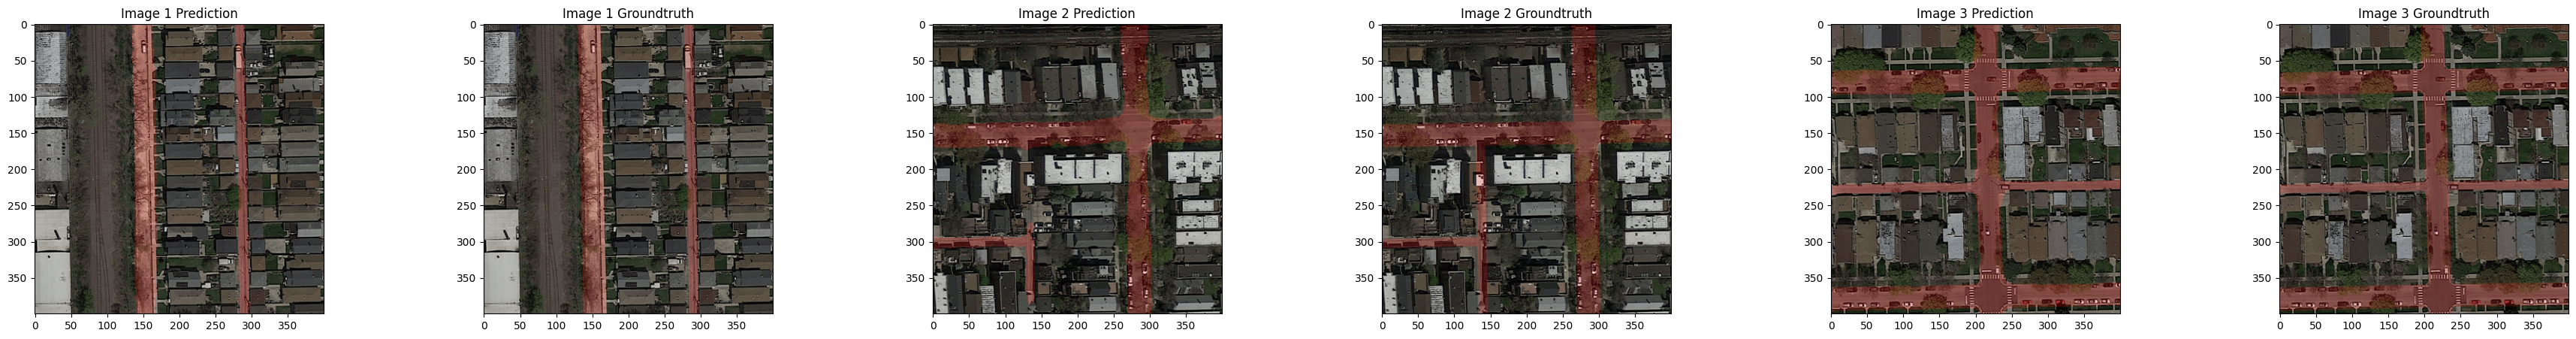

In [26]:
my_show_predictions1(modelA32RDv3, 3)

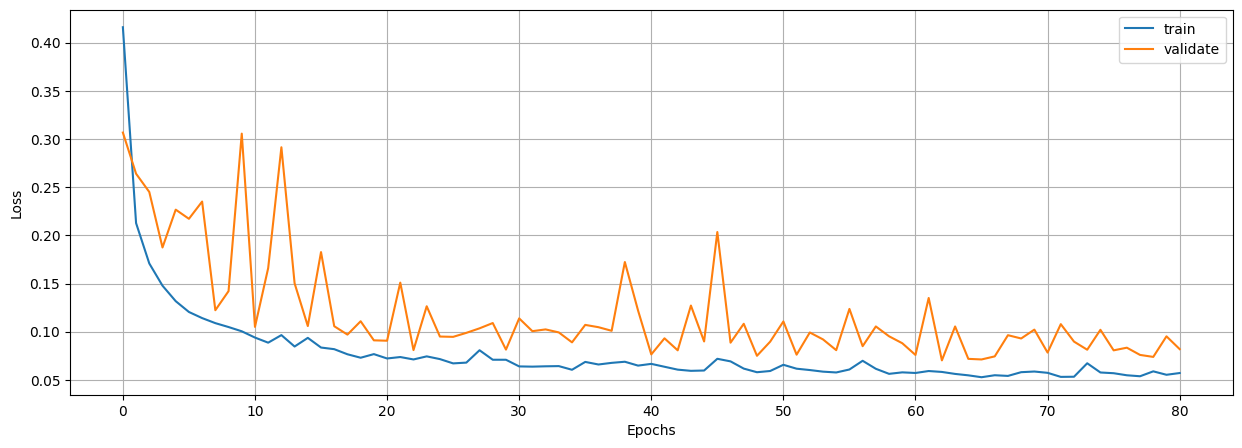

In [27]:
plt.figure(figsize=(15, 5))

plt.plot(history_A32RDv3.history['loss'])
plt.plot(history_A32RDv3.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validate'], loc='upper right')
#plt.ylim([0, 1.3])
plt.grid()
plt.show()

## **5th model : U-Net A32RDv4**
U-net model with 4 stages starting with a filter of size 32. 1e-8 L2-regularization, 0.08 dropout, trained with batch sizes 16.

In [28]:
modelA64RDv3 = build_unet(start_filter=32, num_stages= 4,dropout = 0.08, activation='relu', regularization=1e-8)
modelA64RDv3.compile(optimizer='adam',
                loss=TverskyLoss,
                metrics=['accuracy'])
callbacks_A64RDv3 = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64RDv3', save_weights_only=True, verbose=1)]
history_A64RDv3 = modelA64RDv3.fit(x_tr, y_tr, batch_size=16, epochs=200, validation_data=(x_te, y_te), callbacks=[callbacks_A64RDv3])

Epoch 1/200
69/70 [============================>.] - ETA: 0s - loss: 0.1850 - accuracy: 0.8348
Epoch 1: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64RDv3
70/70 [==============================] - 53s 189ms/step - loss: 0.1851 - accuracy: 0.8348 - val_loss: 0.2115 - val_accuracy: 0.7886
Epoch 2/200
69/70 [============================>.] - ETA: 0s - loss: 0.0860 - accuracy: 0.9181
Epoch 2: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64RDv3
70/70 [==============================] - 11s 164ms/step - loss: 0.0860 - accuracy: 0.9181 - val_loss: 0.2548 - val_accuracy: 0.7453
Epoch 3/200
69/70 [============================>.] - ETA: 0s - loss: 0.0710 - accuracy: 0.9308
Epoch 3: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA64RDv3
70/70 [==============================] - 11s 164ms/step - loss: 0.0709 - accuracy: 0.9309 - val_loss: 0.1647 - val_accuracy: 0.8354
Epoch 4/200
69/70 [=====================

In [29]:
train_f1=evaluating_model_f1(x_tr, y_tr, modelA64RDv3)
print("the training f1 score is: ", train_f1)

validate_f1=evaluating_model_f1(x_te, y_te, modelA64RDv3)
print("the validating f1 score is:", validate_f1)

35/35 [==============================] - 3s 66ms/step
the training f1 score is:  0.9698980880771784
7/7 [==============================] - 0s 66ms/step
the validating f1 score is: 0.9042230345658467


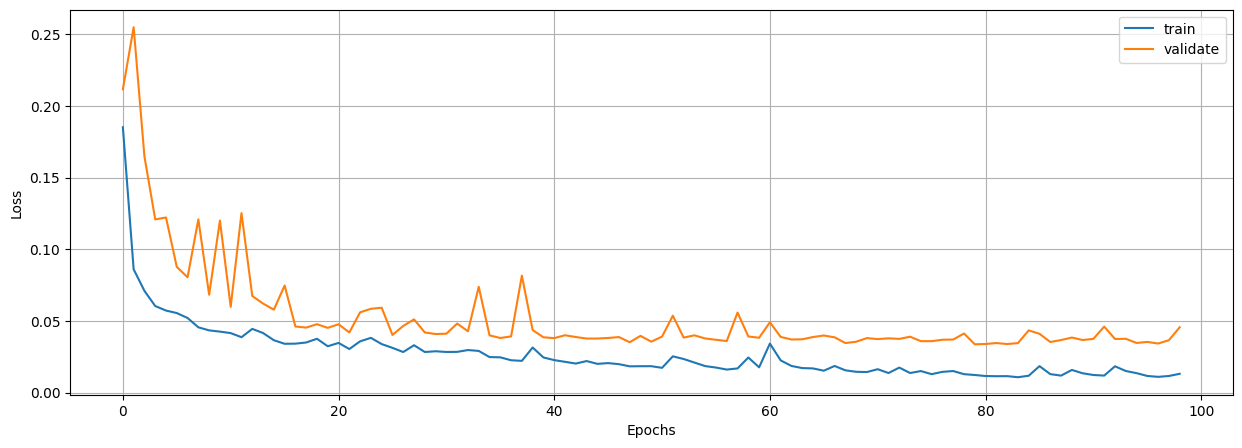

In [30]:
plt.figure(figsize=(15, 5))

plt.plot(history_A64RDv3.history['loss'])
plt.plot(history_A64RDv3.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validate'], loc='upper right')
#plt.ylim([0, 1.3])
plt.grid()
plt.show()

## **6th model : U-Net A16RD**
U-net model with 4 stages starting with a filter of size 16. 1e-6 L2-regularization, 0.1 dropout, trained with batch sizes 8.

In [8]:
modelA16RD = build_unet(start_filter=16, num_stages= 4,dropout = 0.1, activation='relu', regularization=1e-6)
modelA16RD.compile(optimizer='adam',
                loss=TverskyLoss,
                metrics=['accuracy'])
callbacks_A16RD = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA16RD', save_weights_only=True, verbose=1)]
history_A16RD = modelA16RD.fit(x_tr, y_tr, batch_size=8, epochs=200, validation_data=(x_te, y_te), callbacks=[callbacks_A16RD])

Epoch 1/200
139/139 [==============================] - ETA: 0s - loss: 0.2118 - accuracy: 0.8120
Epoch 1: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA16RD
139/139 [==============================] - 31s 123ms/step - loss: 0.2118 - accuracy: 0.8120 - val_loss: 0.1813 - val_accuracy: 0.8221
Epoch 2/200
138/139 [============================>.] - ETA: 0s - loss: 0.1005 - accuracy: 0.9070
Epoch 2: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA16RD
139/139 [==============================] - 13s 93ms/step - loss: 0.1005 - accuracy: 0.9070 - val_loss: 0.1553 - val_accuracy: 0.8485
Epoch 3/200
138/139 [============================>.] - ETA: 0s - loss: 0.0813 - accuracy: 0.9235
Epoch 3: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromA16RD
139/139 [==============================] - 13s 93ms/step - loss: 0.0814 - accuracy: 0.9234 - val_loss: 0.1155 - val_accuracy: 0.8884
Epoch 4/200
138/139 [===============

In [9]:
train_f1=evaluating_model_f1(x_tr, y_tr, modelA16RD)
print("the training f1 score is: ", train_f1)

validate_f1=evaluating_model_f1(x_te, y_te, modelA16RD)
print("the validating f1 score is:", validate_f1)

35/35 [==============================] - 7s 117ms/step
the training f1 score is:  0.9638294256684602
7/7 [==============================] - 0s 67ms/step
the validating f1 score is: 0.887149321124557


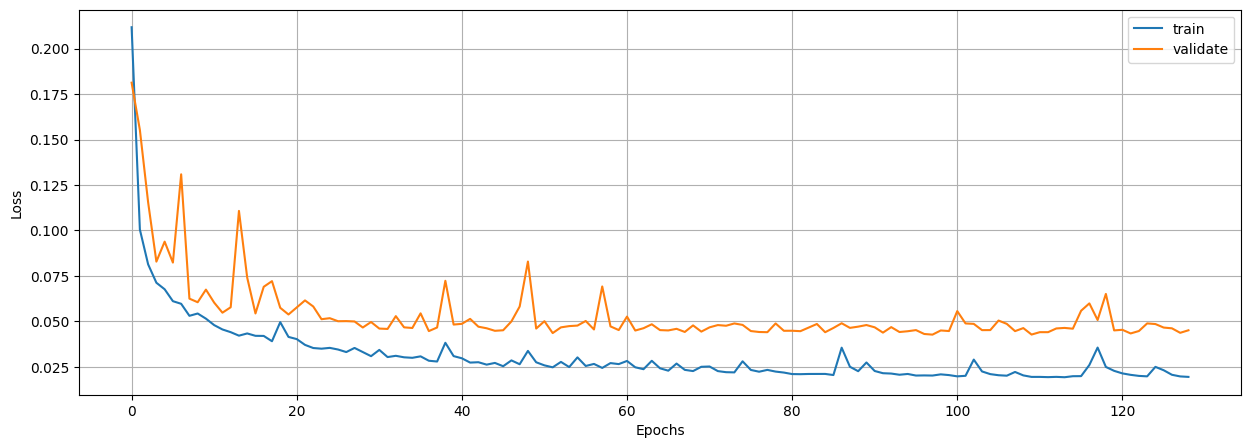

In [10]:
plt.figure(figsize=(15, 5))

plt.plot(history_A16RD.history['loss'])
plt.plot(history_A16RD.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validate'], loc='upper right')
#plt.ylim([0, 1.3])
plt.grid()
plt.show()